In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz 
import matplotlib.pyplot as plt
from IPython.display import Image
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv("data/winequality.csv")
print(data.shape)
X = data.iloc[:,:11]
y = data.iloc[:,11]
train_X,test_X,train_y,test_y = train_test_split(X, y, random_state=0, test_size=0.1)
train_X,val_X,train_y,val_y = train_test_split(X, y, random_state=0, test_size=0.1)
features = list(train_X.columns.values)


(3918, 13)


In [3]:
accuracy = dict()
best_tree = None
best_info = (0,0,None)
for d in range(1,40):
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=d)
    clf_gini.fit(train_X,train_y)
    
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state =0,
                               max_depth=d)
    clf_entropy.fit(train_X,train_y)
    
    train_gini_predict = clf_gini.predict(train_X)
    train_entropy_predict = clf_entropy.predict(train_X)
    
    g_accuracy = cross_val_score(clf_gini, train_X,train_y, cv=3).mean()
    e_accuracy = cross_val_score(clf_entropy, train_X,train_y, cv=3).mean()
    train_g_accuracy = np.sum(train_gini_predict == train_y) / train_y.shape[0]
    train_e_accuracy = np.sum(train_entropy_predict == train_y) / train_y.shape[0]
    accuracy[d] = (g_accuracy,e_accuracy,train_g_accuracy,train_e_accuracy)
    
    best_temp = (0,None)
    if g_accuracy > e_accuracy:
        best_temp = (g_accuracy,'gini')
    else:
        best_temp = (e_accuracy,'entropy')
    if best_temp[0] > best_info[0]:
        best_info = (best_temp[0],d,best_temp[1])

In [4]:
list_g = list()
list_e = list()
train_list_g = list()
train_list_e = list()
for k,v in accuracy.items():
    print("depth: ",k,", entropy accuracy: ",v[1],", gini accuracy: ",v[0])
    list_g.append(v[0])
    list_e.append(v[1])
    train_list_g.append(v[2])
    train_list_e.append(v[3])
print ("best tree: depth: ",best_info[1],", split function: ",best_info[2],", accuracy: ",best_info[0])

depth:  1 , entropy accuracy:  0.44583147177 , gini accuracy:  0.456876501506
depth:  2 , entropy accuracy:  0.505113380132 , gini accuracy:  0.515036198854
depth:  3 , entropy accuracy:  0.520703442002 , gini accuracy:  0.518150981599
depth:  4 , entropy accuracy:  0.525242458949 , gini accuracy:  0.516735196251
depth:  5 , entropy accuracy:  0.528079342077 , gini accuracy:  0.508225265634
depth:  6 , entropy accuracy:  0.525529283314 , gini accuracy:  0.518991911238
depth:  7 , entropy accuracy:  0.528361340989 , gini accuracy:  0.525519876513
depth:  8 , entropy accuracy:  0.524392123741 , gini accuracy:  0.530627947292
depth:  9 , entropy accuracy:  0.520989546367 , gini accuracy:  0.530912124679
depth:  10 , entropy accuracy:  0.521838684451 , gini accuracy:  0.532053630115
depth:  11 , entropy accuracy:  0.52835217583 , gini accuracy:  0.527789144576
depth:  12 , entropy accuracy:  0.536578888238 , gini accuracy:  0.537150364651
depth:  13 , entropy accuracy:  0.541675636325 , gi

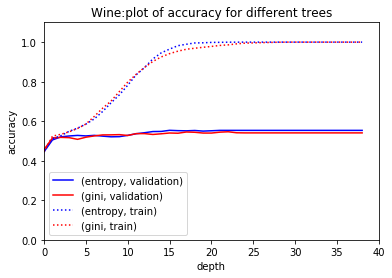

In [11]:
plt.plot(range(len(list_e)),list_e,'b-',label="(entropy, validation)")
plt.plot(range(len(list_g)),list_g,'r-',label="(gini, validation)")
plt.plot(range(len(list_e)),train_list_e,'b:',label="(entropy, train)")
plt.plot(range(len(list_g)),train_list_g,'r:',label="(gini, train)")
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('Wine:plot of accuracy for different trees')
plt.legend()
plt.axis([0,40,0,1.1])
plt.savefig("DT_wine_1.jpg")
plt.show()


In [6]:
clf = DecisionTreeClassifier(criterion = best_info[2], random_state = 0,
                               max_depth=best_info[1])
clf.fit(train_X,train_y)
predict = clf.predict(test_X)
accuracy = np.sum(predict == test_y) / test_y.shape[0]
print("bset tree test accurcy: ",accuracy)

bset tree test accurcy:  0.533163265306


In [7]:
tree.export_graphviz(clf, out_file='tree.dot', 
                        feature_names=features,  
                         class_names=list(map(str, set(y))),  
                         filled=True, rounded=True,  
                         special_characters=True) 
os.system("dot -Tpng tree.dot -o tree.png")
os.system("tree.png")
Image(filename='tree.png')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


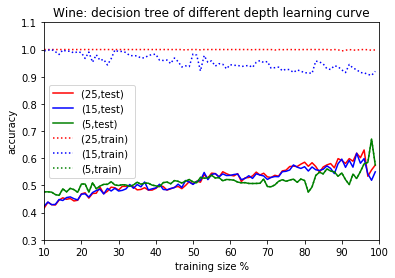

In [8]:
deep_grow_accuracy = list()
middle_grow_accuracy = list()
small_grow_accuracy = list()
train_1 = list()
train_2 = list()
train_3 = list()
for p in range(10,100):
    train_X,test_X,train_y,test_y = train_test_split(X, y, random_state=0, test_size= 1-p/100)
    
    deep_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=25)
    deep_clf_gini.fit(train_X,train_y)
    deep_gini_predict = deep_clf_gini.predict(test_X)
    deep_g_accuracy = accuracy_score(deep_gini_predict,test_y) 
    deep_grow_accuracy.append(deep_g_accuracy)
    tdeep_gini_predict = deep_clf_gini.predict(train_X)
    tdeep_g_accuracy = accuracy_score(tdeep_gini_predict,train_y) 
    train_1.append(tdeep_g_accuracy)
    
   
    middle_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=15)
    middle_clf_gini.fit(train_X,train_y)
    middle_gini_predict = middle_clf_gini.predict(test_X)
    middle_g_accuracy = accuracy_score(middle_gini_predict ,test_y)
    middle_grow_accuracy.append(middle_g_accuracy)
    tmiddle_gini_predict = middle_clf_gini.predict(train_X)
    tmiddle_g_accuracy = accuracy_score(tmiddle_gini_predict, train_y) 
    train_2.append(tmiddle_g_accuracy)

    small_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=5)
    small_clf_gini.fit(train_X,train_y)
    small_gini_predict = small_clf_gini.predict(test_X)
    small_g_accuracy =accuracy_score(small_gini_predict ,test_y)
    small_grow_accuracy.append(small_g_accuracy)
    tsmall_gini_predict = small_clf_gini.predict(train_X)
    tsmall_g_accuracy = accuracy_score(tsmall_gini_predict,train_y)
    train_3.append(small_g_accuracy)




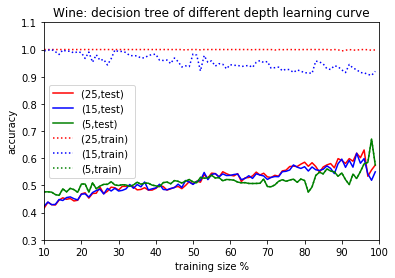

In [12]:
plt.plot(range(10,100),deep_grow_accuracy,'r-',label="(25,test) ")
plt.plot(range(10,100),middle_grow_accuracy,'b-',label="(15,test)")
plt.plot(range(10,100),small_grow_accuracy,'g-',label="(5,test)")

plt.plot(range(10,100),train_1,'r:',label="(25,train) ")
plt.plot(range(10,100),train_2,'b:',label="(15,train)")
plt.plot(range(10,100),train_3,'g:',label="(5,train)")

plt.xlabel('training size %')
plt.ylabel('accuracy')
plt.title('Wine: decision tree of different depth learning curve')
plt.axis([10,100,0.3, 1.1])
plt.legend()
plt.savefig("DT_wine_2.jpg")
plt.show()

In [9]:
train_X,test_X,train_y,test_y = train_test_split(X, y, random_state=0, test_size= 0.2)
start = time.clock()
model = DecisionTreeClassifier(criterion = "gini", random_state = 0,max_depth=5)
model.fit(train_X,train_y)
predict = model.predict(test_X)
elapsed = (time.clock() - start)
print("decision tree model accuracy: ",accuracy_score(predict,test_y),"time used : ",elapsed)

decision tree model accuracy:  0.517857142857 time used :  0.013290999999998832
